In [2]:
import csv
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

data_matrix = []
i = 0
with open ("data.csv") as csvfile:
    data = list(csv.reader(csvfile, delimiter = ' ', quotechar = '|'))
    for row in data[1:]:
        row_list = row[0].split(',')
        data_matrix.append([])
        for data in row_list:
            data_matrix[i].append(float(data))
        i+=1
        
X = [i[:6] for i in data_matrix]
Y = [i[-1] for i in data_matrix]
print("shape of X:",len(X))
print("shape of Y:",len(Y))

Y_class = []
for i in Y:
    if i>=0.8:
        Y_class.append("high") #high probability
    if 0.66<i<0.8:
        Y_class.append("medium") #medium probability
    if i<=0.66:
        Y_class.append("low") #low probability

shape of X: 500
shape of Y: 500


In [151]:
X_ctr, X_cte, Y_ctr, Y_cte = train_test_split(X, Y_class, test_size = 0.2, shuffle = False)

clf = RandomForestClassifier(n_estimators=100, max_depth=7,min_samples_split=2, random_state=0)
clf.fit(X_ctr, Y_ctr)
print("score of classifier with default parameter values:",clf.score(X_cte, Y_cte))

score of classifier with default parameter values: 0.82


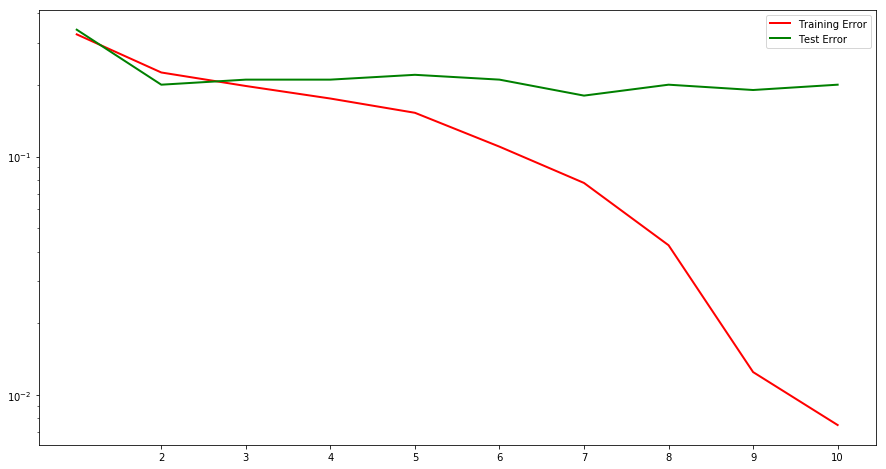

According to the graph, the optimal value for max_depth is: 7


In [156]:
depth = [1,2,3,4,5,6,7,8,9,10]
mse_test = []
mse_train = []

mse_ctest = []
mse_ctrain = []
for d in depth:
    clf = RandomForestClassifier(n_estimators=100, max_depth=d, random_state=0, min_samples_split=2)
    clf.fit(X_ctr, Y_ctr)
    mse_ctest.append(1-clf.score(X_cte, Y_cte))
    mse_ctrain.append(1-clf.score(X_ctr, Y_ctr))

plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.semilogy(depth, mse_ctrain, label = 'Training Error', linewidth = 2, c='r')
plt.semilogy(depth, mse_ctest, label = 'Test Error', linewidth = 2, c='g')
plt.xticks([2,3,4,5,6,7,8,9,10])
plt.legend()
plt.show()
print("According to the graph, the optimal value for max_depth is: 7")

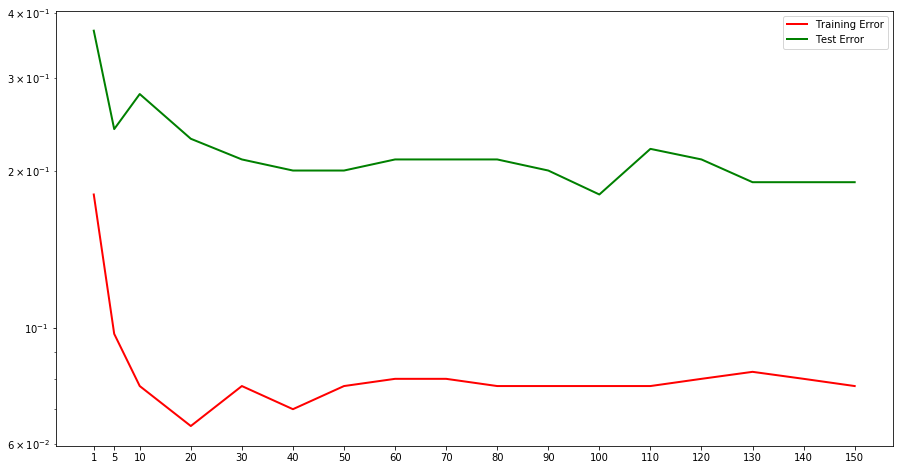

According to the graph, the optimal value for n_estimators is: 100


In [157]:
n_estimators = [1,5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
mse_test = []
mse_train = []

mse_ctest = []
mse_ctrain = []
for n in n_estimators:
    clf = RandomForestClassifier(n_estimators=n, max_depth=7, random_state=0, min_samples_split=2)
    clf.fit(X_ctr, Y_ctr)
    mse_ctest.append(1-clf.score(X_cte, Y_cte))
    mse_ctrain.append(1-clf.score(X_ctr, Y_ctr))
    
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.semilogy(n_estimators, mse_ctrain, label = 'Training Error', linewidth = 2, c='r')
plt.semilogy(n_estimators, mse_ctest, label = 'Test Error', linewidth = 2, c='g')
plt.xticks([1,5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
plt.legend()
plt.show()
print("According to the graph, the optimal value for n_estimators is: 100")

In [158]:
final_clf = RandomForestClassifier(max_depth = 7, random_state = 0, n_estimators = 100, min_samples_split=2)
final_clf.fit(X_ctr, Y_ctr)
print("score of classifier with optimal parameter values:",final_clf.score(X_cte,Y_cte))

score of classifier with optimal parameter values: 0.82


[[24  3  0]
 [ 4 23  8]
 [ 0  3 35]]


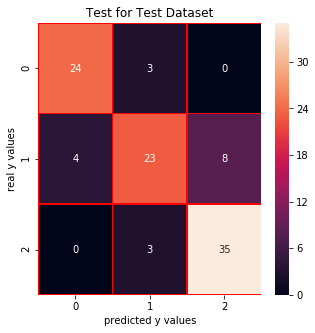

In [159]:
Y_cpre = final_clf.predict(X_cte)
cm_rc=confusion_matrix(Y_cte, Y_cpre, labels=["high", "medium", "low"])
print(cm_rc)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()